In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.timeseries import LombScargle
from sklearn.linear_model import LinearRegression
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

<ipython-input-1-5f9fa11ddcdb>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [ ]:
#import data from google drive for BVR, Stankov et al. data, and extinction coefficient
data1 = pd.read_excel('/content/drive/MyDrive/photometry SX Phe/photometry filter b.xlsx')
sxphe_filter_b = pd.DataFrame(data1)
data2 = pd.read_excel('/content/drive/MyDrive/photometry SX Phe/photometry filter v.xlsx')
sxphe_filter_v = pd.DataFrame(data2)
data3 = pd.read_excel('/content/drive/MyDrive/photometry SX Phe/photometry filter r.xlsx')
sxphe_filter_r = pd.DataFrame(data3)
data4 = pd.read_excel('/content/drive/MyDrive/photometry SX Phe/stromgen.xlsx')
sxphe_stankov = pd.DataFrame(data4)
data_star_b = pd.read_excel('/content/drive/MyDrive/photometry SX Phe/star filter b.xlsx')
extinction_b = pd.DataFrame(data_star_b)
data_star_v = pd.read_excel('/content/drive/MyDrive/photometry SX Phe/star filter v.xlsx')
extinction_v = pd.DataFrame(data_star_v)
data_star_r = pd.read_excel('/content/drive/MyDrive/photometry SX Phe/star filter r.xlsx')
extinction_r = pd.DataFrame(data_star_r)

In [ ]:
#for the B filter, exposure time = 12s
for i in sxphe_filter_b.index:
    t_hjd_b = sxphe_filter_b['HJD_UTC']
    flux_target_b = sxphe_filter_b['Source-Sky_T1']/sxphe_filter_b['EXPTIME']
    flux_comp_b = sxphe_filter_b['Source-Sky_C2']/sxphe_filter_b['EXPTIME']
    airmass_b = sxphe_filter_b['AIRMASS']
#for the V filter, exposure time = 3s
for i in sxphe_filter_v.index:
    t_hjd_v = sxphe_filter_v['HJD_UTC']
    flux_target_v = sxphe_filter_v['Source-Sky_T1']/sxphe_filter_v['EXPTIME']
    flux_comp_v = sxphe_filter_v['Source-Sky_C2']/sxphe_filter_v['EXPTIME']
    airmass_v = sxphe_filter_v['AIRMASS']
#for the R filter, exposure time = 6s
for i in sxphe_filter_r.index:
    t_hjd_r = sxphe_filter_r['HJD_UTC']
    flux_target_r = sxphe_filter_r['Source-Sky_T1']/sxphe_filter_r['EXPTIME']
    flux_comp_r = sxphe_filter_r['Source-Sky_C2']/sxphe_filter_r['EXPTIME']
    airmass_r = sxphe_filter_r['AIRMASS']
#from the literature data
for i in sxphe_stankov.index:
  t_hjd_lit1 = sxphe_stankov['HJD']
  mag_lit1 = sxphe_stankov['V mag']
  t_hjdplus_lit1 = sxphe_stankov['HJD +2448900']

In [ ]:
#if you want to change flux to mag then
mag_b = -2.5 * np.log10(flux_target_b)
mag_v = -2.5 * np.log10(flux_target_v)
mag_r = -2.5 * np.log10(flux_target_r)

In [ ]:
#standard star magnitudes
mags_std_b = 11.765
mags_std_v = 10.627
mags_std_r = 9.893
mags_std_i = 9.266
mags_bv = mags_std_b - mags_std_v
mags_vr = mags_std_v - mags_std_r
#for extinction
#if you want to change flux to mag then
mag_star_fil_b = -2.5 * np.log10(extinction_b['Source-Sky_T1']/extinction_b['EXPTIME'])
mag_star_fil_v = -2.5 * np.log10(extinction_v['Source-Sky_T1']/extinction_v['EXPTIME'])
mag_star_fil_r = -2.5 * np.log10(extinction_r['Source-Sky_T1']/extinction_r['EXPTIME'])

In [ ]:
#fitting linear fit to the standard star data
#for filter b
x_b = extinction_b['AIRMASS'].values.reshape(-1,1)
y_b = mag_star_fil_b.values.reshape(-1,1)
model_b = LinearRegression()
model_b.fit(x_b,y_b)
y_predict_b = model_b.predict(x_b)
#for filter v
x_v = extinction_v['AIRMASS'].values.reshape(-1,1)
y_v = mag_star_fil_v.values.reshape(-1,1)
model_v = LinearRegression()
model_v.fit(x_v,y_v)
y_predict_v = model_v.predict(x_v)
#for filter v
x_r = extinction_r['AIRMASS'].values.reshape(-1,1)
y_r = mag_star_fil_r.values.reshape(-1,1)
model_r = LinearRegression()
model_r.fit(x_r,y_r)
y_predict_r = model_r.predict(x_r)

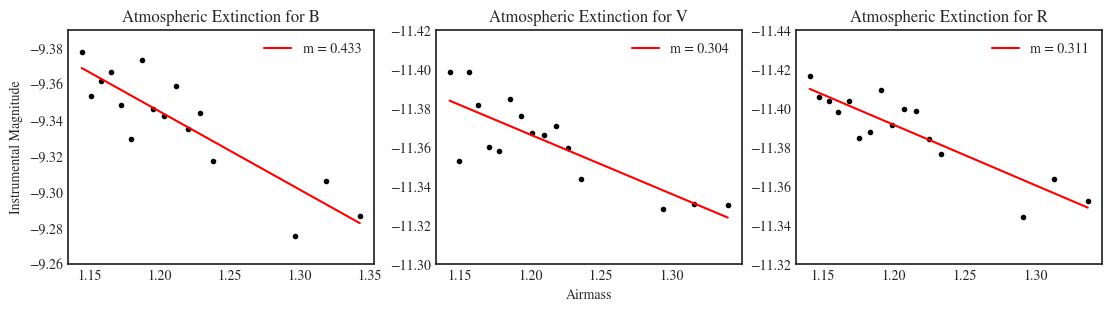

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(11,3), constrained_layout=True)
ax[0].scatter(x_b, y_b, c='k', marker='.')
ax[0].plot(x_b, y_predict_b, 'r-', label=f'm = {np.round(model_b.coef_[0,0],3)}')
ax[0].set(title='Atmospheric Extinction for B', ylabel='Instrumental Magnitude', ylim=(-9.26,-9.39))
#ax[0].legend(loc='upper right')
ax[1].scatter(x_v, y_v, c='k', marker='.')
ax[1].plot(x_v, y_predict_v, 'r-', label=f'm = {np.round(model_v.coef_[0,0],3)}')
ax[1].set(title='Atmospheric Extinction for V', xlabel='Airmass', ylim=(-11.3,-11.42))
ax[2].scatter(x_r, y_r, c='k', marker='.')
ax[2].plot(x_r, y_predict_r, 'r-', label=f'm = {np.round(model_r.coef_[0,0],3)}')
ax[2].set(title='Atmospheric Extinction for R', ylim=(-11.32,-11.44))
for i in range(3):
  ax[i].legend(loc='upper right')
fig.savefig('Atmospheric Extinction.jpg',dpi=300,bbox_inches='tight',pad_inches=0.1)

In [ ]:
#parameter of atmospher
zeropoint_b = model_b.intercept_[0]
zeropoint_v = model_v.intercept_[0]
zeropoint_r = model_r.intercept_[0]
mzp_b = mags_std_b - zeropoint_b
mzp_v = mags_std_v - zeropoint_v
mzp_r = mags_std_r - zeropoint_r
kappa_b = model_b.coef_[0,0]
kappa_v = model_v.coef_[0,0]
kappa_r = model_r.coef_[0,0]
print(f"extinction coefficient for b,v,r, = \n{kappa_b} \n{kappa_v} \n{kappa_r}")
print(' ')
print(f"instrumental zero point for b,v,r, = \n{mzp_b} \n{mzp_v} \n{mzp_r}")

extinction coefficient for b,v,r, = 
0.4332579858278515 
0.30354515086891554 
0.3106350761203113
 
instrumental zero point for b,v,r, = 
21.62953280484737 
22.35749455307288 
21.65714001730027


In [ ]:
data5 = pd.read_excel('/content/drive/MyDrive/photometry SX Phe/abs_b.xlsx')
abs_b = pd.DataFrame(data5)
hjd_b, mag_abs_b = abs_b['HJD_b'], abs_b['mag_b']
data6 = pd.read_excel('/content/drive/MyDrive/photometry SX Phe/abs_v.xlsx')
abs_v = pd.DataFrame(data6)
hjd_v, mag_abs_v = abs_v['HJD_v'], abs_v['mag_v']
data7 = pd.read_excel('/content/drive/MyDrive/photometry SX Phe/abs_r.xlsx')
abs_r = pd.DataFrame(data7)
hjd_r, mag_abs_r = abs_r['HJD_r'], abs_r['mag_r']

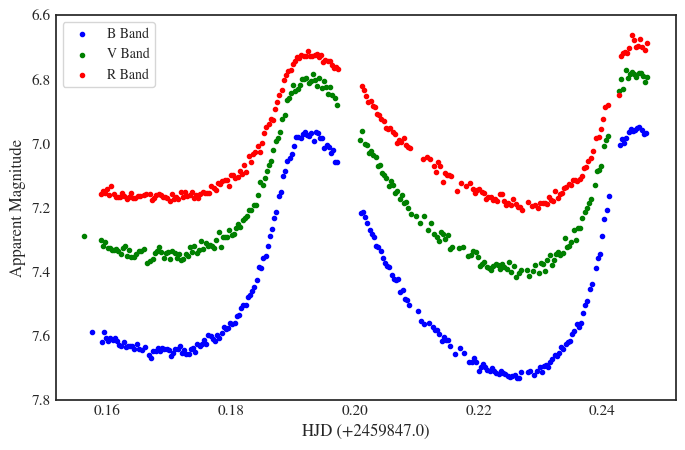

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(hjd_b-2459847.0, mag_abs_b, color='b', marker='.', label='B Band')
ax.scatter(hjd_v-2459847.0, mag_abs_v, color='g', marker='.', label='V Band')
ax.scatter(hjd_r-2459847.0, mag_abs_r, color='r', marker='.', label='R Band')
ax.set(ylim=(7.8,6.6))
for label in (ax.get_xticklabels() + ax.get_yticklabels()): label.set_fontsize(11)
ax.set_xlabel('HJD (+2459847.0)', fontsize=12)
ax.set_ylabel('Apparent Magnitude', fontsize=12)
ax.legend(frameon=True)
fig.savefig('apparent mag.jpg',dpi=300,bbox_inches='tight',pad_inches=0.1)

In [ ]:
print(f'Magnitude in B-band is {round(np.min(mag_abs_b),2)} - {round(np.max(mag_abs_b),2)} \u00B1 {round(np.std(mag_abs_b),2)}')
print(f'Magnitude in V-band is {round(np.min(mag_abs_v),2)} - {round(np.max(mag_abs_v),2)} \u00B1 {round(np.std(mag_abs_v),2)}')
print(f'Magnitude in R-band is {round(np.min(mag_abs_r),2)} - {round(np.max(mag_abs_r),2)} \u00B1 {round(np.std(mag_abs_r),2)}')

Magnitude in B-band is 6.95 - 7.73 ± 0.25
Magnitude in V-band is 6.77 - 7.42 ± 0.2
Magnitude in R-band is 6.66 - 7.21 ± 0.17


In [ ]:
#color index
b_v = mag_abs_b - mag_abs_v
v_r = mag_abs_v - mag_abs_r
obs_bv = np.mean(b_v)
obs_vr = np.mean(v_r)
print(f'the B - V is {round(obs_bv,2)}')
print(f'the V - R is {round(obs_vr,2)}')

the B - V is 0.27
the V - R is 0.16


In [ ]:
Teff = 4600 * ((1/((0.92*b_v)+1.7))+(1/((0.92*b_v)+0.62)))
print(f'The Effective Temperature of SX Phe is {round(np.mean(Teff),0)} \u00B1 {round(np.std(Teff),0)} kelvin')

The Effective Temperature of SX Phe is 7693.0 ± 411.0 kelvin


In [ ]:
true_bv = 0.27
E_bv = obs_bv - true_bv
err_E_bv = np.std(b_v)
print(f'the E(b-v) is {round(E_bv,3)} \u00B1 {round(err_E_bv,3)}')

the E(b-v) is -0.002 ± 0.057


In [ ]:
m_bv = mag_abs_b - mag_abs_v
m_vr = mag_abs_v - mag_abs_r
teff_array = 4600 * ((1/((0.92*m_bv)+1.7))+(1/((0.92*m_bv)+0.62)))

In [ ]:
print(np.max(teff_array))
print(np.min(teff_array))

9794.564991059538
7037.634956374906


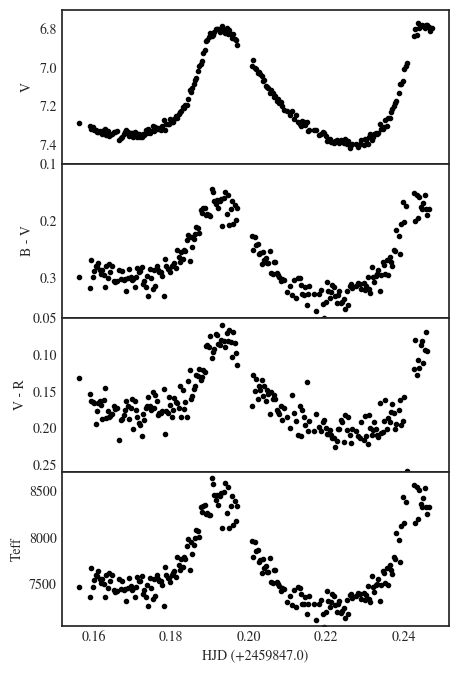

In [ ]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(5,8))
fig.subplots_adjust(hspace=0)
axs[0].plot(hjd_v-2459847.0, mag_abs_v, 'k.',label='Pita v')
axs[0].set_ylim(7.5,6.7)
axs[0].set_ylabel('V')
axs[1].plot(hjd_v-2459847.0,b_v, 'k.')
axs[1].set_ylabel('B - V')
axs[1].set_ylim(0.37,0.1)
axs[2].plot(hjd_v-2459847.0, v_r, 'k.')
axs[2].set(ylabel='V - R', ylim=(0.26,0.05))
axs[3].plot(hjd_v-2459847.0,teff_array,'k.')
axs[3].set(xlabel='HJD (+2459847.0)', ylabel='Teff', ylim=(7050,8700))
fig.savefig('teff.jpg',dpi=300,bbox_inches='tight',pad_inches=0.1)

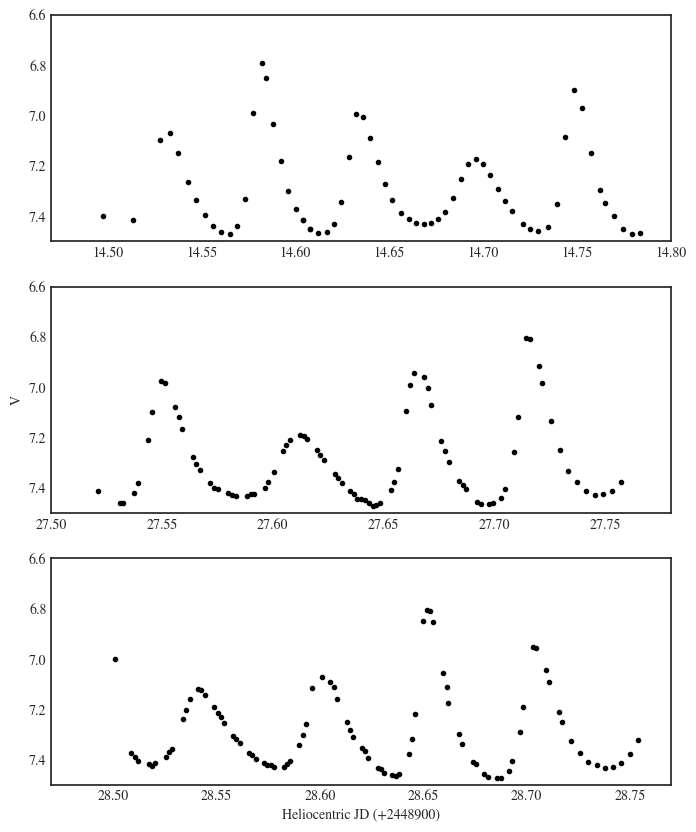

In [ ]:
fig, ax2 = plt.subplots(3, 1, figsize=(8,10))
ax2[0].plot(t_hjdplus_lit1,mag_lit1,'k.')
ax2[0].set_xlim(14.47,14.8)
ax2[0].set_ylim(7.5,6.6)
ax2[1].plot(t_hjdplus_lit1,mag_lit1,'k.')
ax2[1].set_xlim(27.5,27.78)
ax2[1].set_ylim(7.5,6.6)
ax2[1].set_ylabel('V')
ax2[2].plot(t_hjdplus_lit1, mag_lit1,'k.')
ax2[2].set_xlim(28.47,28.77)
ax2[2].set_ylim(7.5,6.6)
ax2[2].set_xlabel('Heliocentric JD (+2448900)')
fig.savefig('rollan.jpg',dpi=300,bbox_inches='tight',pad_inches=0.1)

In [ ]:
#doin photometry diferential
rel_flux = flux_target_v/flux_comp_v
rel_mag = -2.5 * np.log10(rel_flux/sxphe_filter_v['EXPTIME'])

[(-0.4, -1.2)]

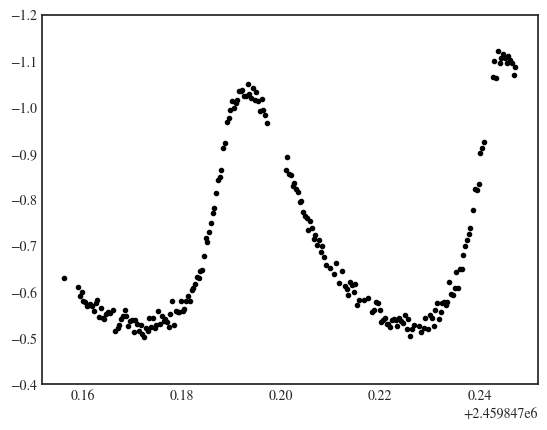

In [ ]:
fig,ax = plt.subplots()
ax.plot(t_hjd_v, rel_mag, 'k.')
ax.set(ylim=(-0.4,-1.2))

In [ ]:
ls = LombScargle(hjd_v, mag_abs_v)
frequency, power = ls.autopower(nyquist_factor=500, normalization='model', samples_per_peak=100)
period_days = 1. / frequency
period_hours = period_days * 24
best_frequency = frequency[np.argmax(power)]
best_period = period_days[np.argmax(power)]
best_period_hours = period_hours[np.argmax(power)]
print("Best period: {0:.6f} hours".format(best_period_hours))
print("Best period: {0:.6f} days".format(best_period))
print("Best frequency: {0:.6f} c/d".format(best_frequency))

Best period: 1.304093 hours
Best period: 0.054337 days
Best frequency: 18.403595 c/d


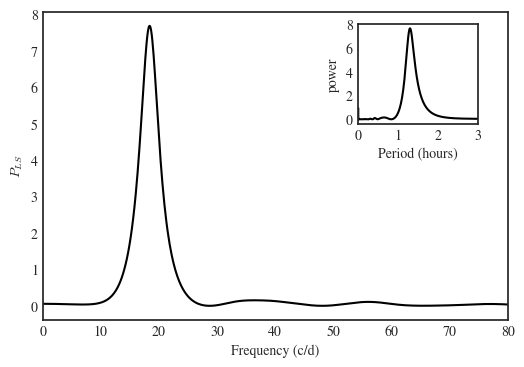

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(frequency, power, color='k')
ax.set(xlim=(0, 80),
          xlabel='Frequency (c/d)',
          ylabel='$P_{LS}$')

inset = fig.add_axes([0.65, 0.6, 0.2, 0.25])
inset.plot(period_hours, power, '-k', rasterized=True)
inset.xaxis.set_major_locator(plt.MultipleLocator(1))
inset.yaxis.set_major_locator(plt.MultipleLocator(2))
inset.set(xlim=(0, 3),
          xlabel='Period (hours)',
          ylabel='power')
fig.savefig('Lomb.jpg',dpi=300,bbox_inches='tight',pad_inches=0.1)

In [ ]:
ls = LombScargle(hjd_v, mag_abs_v,nterms=3)
frequency, power = ls.autopower(minimum_frequency=18.19357,maximum_frequency=18.194)
best_frequency = frequency[np.argmax(power)]
period_days = 1. / frequency
best_period = period_days[np.argmax(power)]
phase = (t_hjd_v / best_period) % 1
print("Best frequency: {0:.9f} days".format(best_frequency))
print("Best period: {0:.9f} days".format(best_period))

Best frequency: 18.193570000 days
Best period: 0.054964474 days


In [ ]:
ls2 = LombScargle(t_hjd_lit1, mag_lit1)
frequency2, power2 = ls2.autopower(nyquist_factor=500, samples_per_peak=300)
best_frequency2 = frequency2[np.argmax(power2)]
period_days2 = 1. / frequency2
best_period2 = period_days2[np.argmax(power2)]
phase2 = (t_hjd_lit1 / best_period2) % 1
print("Best frequency: {0:.9f} days".format(best_frequency2))
print("Best period: {0:.9f} days".format(best_period2))

Best frequency: 18.194072286 days
Best period: 0.054962956 days


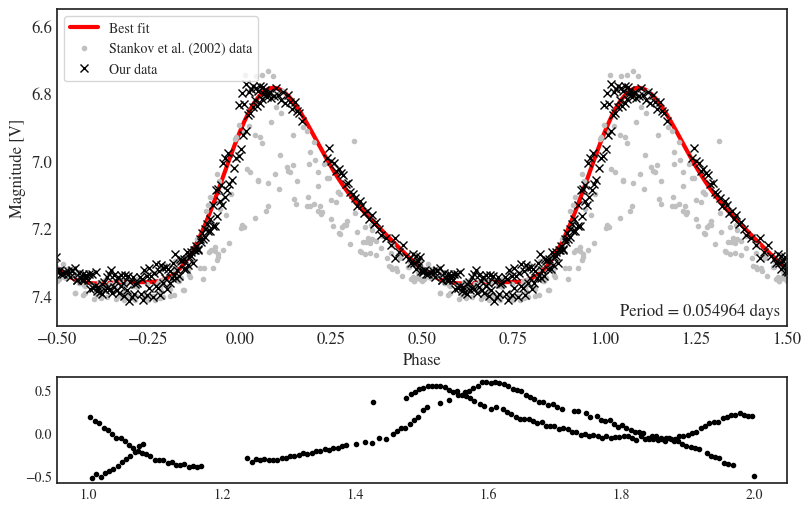

In [ ]:
ril_period = 0.054964438
fig, ax = plt.subplots(2,1,figsize=(8, 5), gridspec_kw={'height_ratios': [3, 1]}, constrained_layout = True)

phase_model = np.linspace(-1, 2, 222)
best_frequency = frequency[np.argmax(power)]
mag_model = ls.model(phase_model / best_frequency, best_frequency)
residu = mag_abs_v - mag_model
for offset in [-1, 0, 1]:
  ax[0].errorbar(phase2+offset+0.15, mag_lit1-0.06, fmt='.',color='silver',label='Stankov et. al. data')
  ax[0].errorbar(phase+offset, mag_abs_v, fmt='x',color='k',label='IRT data')
ax[0].plot(phase_model-0.005, mag_model, '-r', lw=3)
ax[0].set(xlim=(-0.5, 1.5),
       ylim=(7.49,6.55))
ax[0].set_xlabel('Phase',fontsize=12)
ax[0].set_ylabel('Magnitude [V]',fontsize=12)
ax[0].legend(['Best fit','Stankov et al. (2002) data','Our data'], loc='upper left', frameon=True)
ax[0].annotate("Period = {0:.6f} days".format(ril_period), xy=(1, 0), xycoords="axes fraction",
            xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=12,)
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
  label.set_fontsize(12)
ax[1].plot(phase+offset, residu, 'k.')
#ax.text(0.9, 0, 'Period = {0:.2f} days'.format(ril_period),color='black',ha='right',va='bottom',transform=ax.transAxes)
fig.savefig('lightkurve.jpg',dpi=300,bbox_inches='tight',pad_inches=0.1)

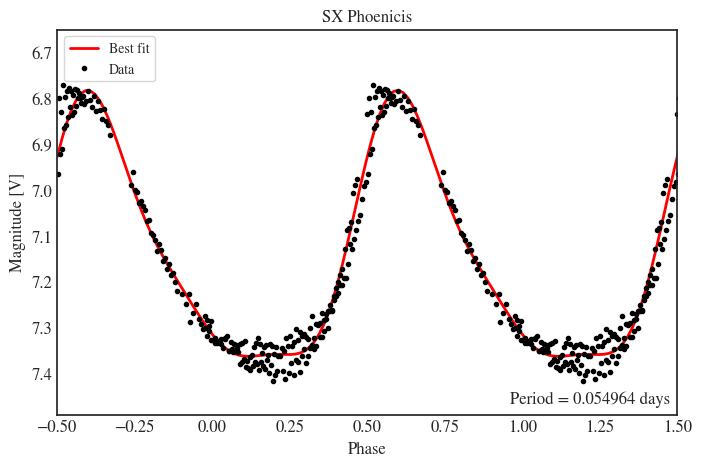

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
for offset in [-1, 0, 1]:
  ax.errorbar(phase+offset+0.5, mag_abs_v, fmt='.',color='k',label='IRT data')
  #ax.errorbar(phase2+offset+0.25, mag_lit1-.1, fmt='.',color='silver',label='Stankov et. al. data')
ax.plot(phase_model+0.5, mag_model, '-r', lw=2)
ax.set(xlim=(-0.5, 1.5),
       ylim=(7.49,6.65), title='SX Phoenicis')
ax.legend(['Best fit','Data'], loc='upper left', frameon=True)
plt.xlabel('Phase',fontsize=12)
plt.ylabel('Magnitude [V]',fontsize=12)
ax.annotate("Period = {0:.6f} days".format(ril_period), xy=(1, 0), xycoords="axes fraction",
            xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=12,)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  label.set_fontsize(12)


In [ ]:
max_y = max(rel_mag)  # Find the maximum y value
max_x = t_hjd_v[rel_mag.argmax()]  # Find the x value corresponding to the maximum y value
print(max_x, max_y)

2459847.172349167 -0.5024359898654621


In [ ]:
#calculate the o - c
tmax_1 = np.round(2459847.19148604,4)
tmax_2 = np.round(2459847.244792212,4)
tmin_1 = np.round(2459847.172349167,4)
tmin_2 = np.round(2459847.228782,4)
st_ = 2448927.6636
E = 385896
b = 0.28503575 * E - 0.107
a = 2*np.pi * b
ephemeris = 2438636.6170 + (0.054964438 * E) - 0.00325 * np.sin(a)
print(ephemeris)
print(np.round(tmax_1-ephemeris,4))

2459847.172785827
0.0187


In [ ]:
E = 385897
ephemeris = 2438636.6170 + (0.054964438 * E) - 0.00325 * np.sin(a)
print(ephemeris)
print(np.round(tmax_2-ephemeris,4))

2459847.227750265
0.017


In [ ]:
tmax_1 - tmin_1

0.01919999998062849

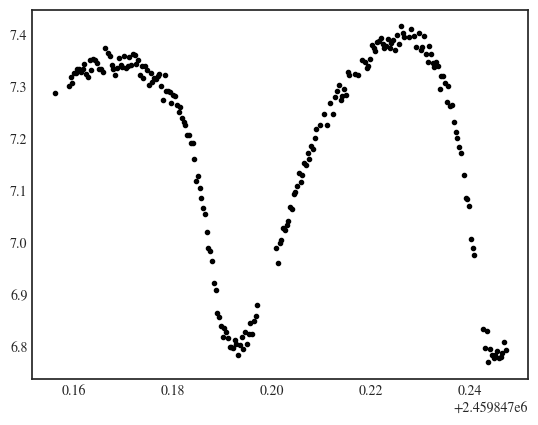

In [ ]:
import matplotlib.pyplot as plt
plt.plot(abs_v['HJD_v'], abs_v['mag_v'], 'k.')